In [23]:
# Matt Wyrick
# Risk Factor Decomposition

import yfinance as yf
import datetime as dt
import plotly.express as px

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tools as sm_tools

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")


In [3]:
# Set the dates for analysis

START_YEAR = 2022
START_MONTH = 2
START_DAY = 1

END_YEAR = 2024
END_MONTH = 2
END_DAY = 1

ORIGINATION_DATE = dt.datetime(year=START_YEAR, month=START_MONTH, day=START_DAY)
MATURITY_DATE = dt.datetime(year=END_YEAR, month=END_MONTH, day=END_DAY)

DURATION_DAYS = (MATURITY_DATE - ORIGINATION_DATE).days
DURATION_YEARS = DURATION_DAYS / 365


def get_yf_data(dtime):
    year = dtime.year
    month = f"0{dtime.month}" if dtime.month < 10 else dtime.month
    day = f"0{dtime.day}" if dtime.day < 10 else dtime.day
    return f"{year}-{month}-{day}"


ORIGINATION_DATE, MATURITY_DATE

(datetime.datetime(2022, 2, 1, 0, 0), datetime.datetime(2024, 2, 1, 0, 0))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


California Resources Corporation


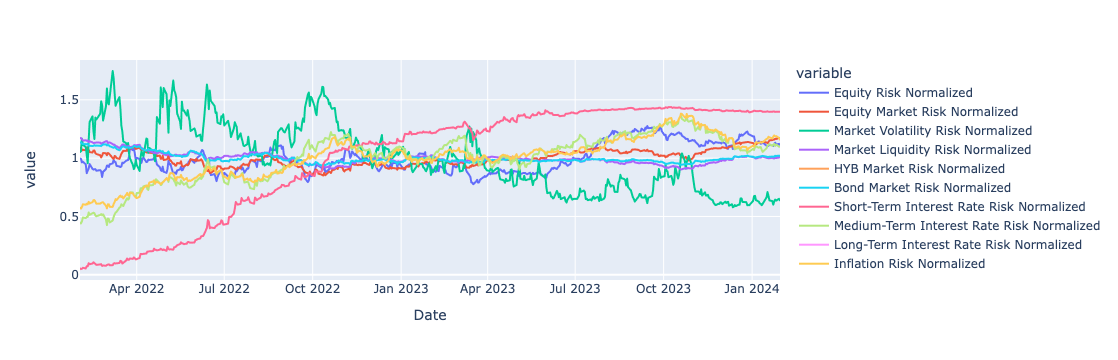

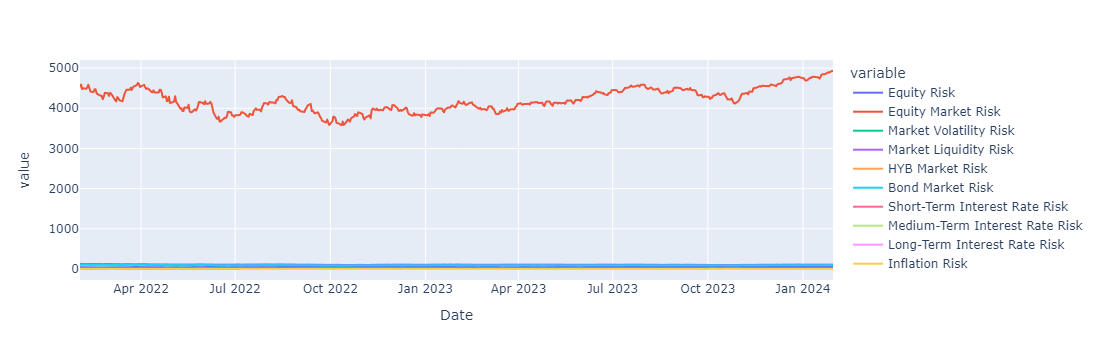

In [5]:
# Pull Available Risk Factors


df_raw = pd.DataFrame()


# Equity Risk
TICKER = "CRC"
company = yf.Ticker("CRC")
company_name = company.info['longName']

df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw.index = df_tmp.index
df_raw["Date"] = df_tmp.index
df_raw["Equity Risk"] = df_tmp["Close"]
df_raw["Equity Risk Normalized"] = df_raw["Equity Risk"] / df_raw["Equity Risk"].mean()


# Equity Market Risk
TICKER = "^GSPC"  # s&p500
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Equity Market Risk"] = df_tmp["Close"]
df_raw["Equity Market Risk Normalized"] = df_raw["Equity Market Risk"] / df_raw["Equity Market Risk"].mean()


# Market Volatility Risk
TICKER = "^VIX"  # CBOE Vix Index
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Market Volatility Risk"] = df_tmp["Close"]
df_raw["Market Volatility Risk Normalized"] = df_raw["Market Volatility Risk"] / df_raw["Market Volatility Risk"].mean()


# Market Liquidity Risk
TICKER = "LQD"  # iShares iBoxx $ Investment Grade Corporate Bond ETF (LQD)
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Market Liquidity Risk"] = df_tmp["Close"]
df_raw["Market Liquidity Risk Normalized"] = df_raw["Market Liquidity Risk"] / df_raw["Market Liquidity Risk"].mean()


# High Yield Bond Market Risk
TICKER = "JNK"  # blackrock HYB ETF
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["HYB Market Risk"] = df_tmp["Close"]
df_raw["HYB Market Risk Normalized"] = df_raw["HYB Market Risk"] / df_raw["HYB Market Risk"].mean()


# Bond Market Risk
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Bond Market Risk"] = df_tmp["Close"]
df_raw["Bond Market Risk Normalized"] = df_raw["Bond Market Risk"] / df_raw["Bond Market Risk"].mean()


# Short term Interest Rate Risk
TICKER = "^IRX"  # 13-week Treasury bill yield
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Short-Term Interest Rate Risk"] = df_tmp["Close"]
df_raw["Short-Term Interest Rate Risk Normalized"] = df_raw["Short-Term Interest Rate Risk"] / df_raw["Short-Term Interest Rate Risk"].mean()


# Medium term Interest Rate Risk
TICKER = "^FVX"
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Medium-Term Interest Rate Risk"] = df_tmp["Close"]
df_raw["Medium-Term Interest Rate Risk Normalized"] = df_raw["Medium-Term Interest Rate Risk"] / df_raw["Medium-Term Interest Rate Risk"].mean()


# Long term Interest Rate Risk
TICKER = "^TYX"
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw["Long-Term Interest Rate Risk"] = df_tmp["Close"]
df_raw["Long-Term Interest Rate Risk Normalized"] = df_raw["Long-Term Interest Rate Risk"] / df_raw["Long-Term Interest Rate Risk"].mean()


# Inflation Risk
df_tmp = yf.download(TICKER, start=get_yf_data(ORIGINATION_DATE), end=get_yf_data(MATURITY_DATE))
df_raw.index = df_tmp.index
df_raw["Date"] = df_tmp.index
df_raw["Inflation Risk"] = df_tmp["Close"]
df_raw["Inflation Risk Normalized"] = df_raw["Inflation Risk"] / df_raw["Inflation Risk"].mean()


# Update desired dates based on actual data
ORITINATION_DATE = df_raw["Date"].iloc[0]
MATURITY_DATE = df_raw["Date"].iloc[-1]
DURATION_DAYS = (MATURITY_DATE - ORIGINATION_DATE).days
DURATION_YEARS = DURATION_DAYS / 365


print(company_name)
normalized_columns = [c for c in df_raw.columns if "Normalized" in c]
px.line(df_raw, x="Date", y=normalized_columns).show()  # scaled similarlly for viewing / shaped preserved

not_normalized_columns = [c for c in df_raw.columns if "Normalized" not in c and c != "Date"]
px.line(df_raw, x="Date", y=not_normalized_columns).show()  # scaled similarlly for viewing / shaped preserved

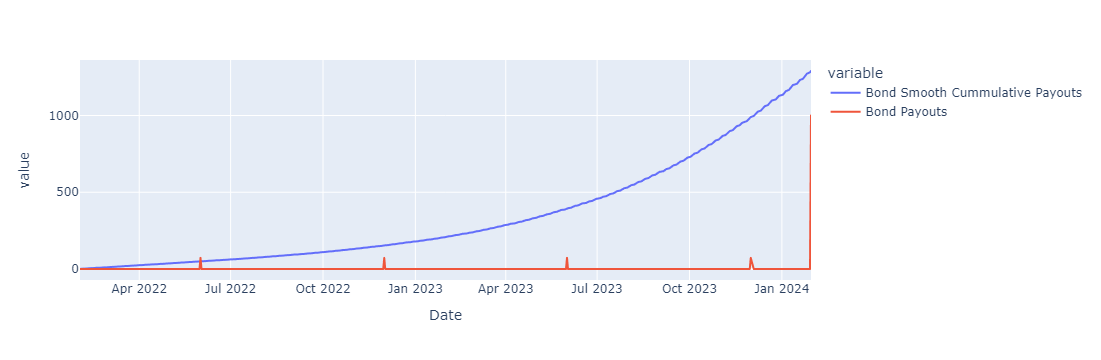

In [6]:
# Generate the bond payout information

BOND = "CRC5112526"

bond_face_value = 1000
bond_coupon_rate = 0.0725
bond_coupon_payout = bond_face_value * bond_coupon_rate  # semi-annually
bond_purchase_price = bond_face_value * 0.95

df_bond = pd.DataFrame()
df_bond.index = df_raw.index
df_bond["Date"] = df_raw["Date"]
df_bond["Bond Payout Flag"] = df_bond["Date"].apply(lambda x: 1 if x.day == 1 and x.month in (6, 12) else 0)  # semi-annually
df_bond["Bond Payouts"] = df_bond["Bond Payout Flag"].apply(lambda x: bond_coupon_payout if x > 0 else 0.0)

df_bond["Bond Payouts"].iloc[-1] = bond_face_value

N = df_bond.shape[0]

M = (df_bond["Bond Payouts"].sum() - bond_face_value) / N
df_bond["Bond Uniform Coupon Payouts"] = np.array([M * (x + 1) for x in range(N)])

M = bond_face_value / N
exponent = N * 0.008
df_bond["Bond Nonlinear Face Value Payouts"] = np.array([M * ((x + 1) / N)**exponent for x in range(N)])
adjustment_rate = bond_face_value / df_bond["Bond Nonlinear Face Value Payouts"].iloc[-1]
df_bond["Bond Nonlinear Face Value Payouts"] = df_bond["Bond Nonlinear Face Value Payouts"] * adjustment_rate
df_bond["Bond Smooth Cummulative Payouts"] = df_bond["Bond Nonlinear Face Value Payouts"] + df_bond["Bond Uniform Coupon Payouts"]
df_bond["Bond Smooth Cummulative Payouts Normalized"] = df_bond["Bond Smooth Cummulative Payouts"] / df_bond["Bond Smooth Cummulative Payouts"].mean()


px.line(df_bond, x="Date", y=["Bond Smooth Cummulative Payouts", "Bond Payouts"])

In [36]:
# # ONLY RUN THIS CELL TO MINE SEEDS
# # Simulate the bond price and mine ideal conditions


# N = df_bond.shape[0]
# exponent = 0.0000005

# bond_diffs = df_bond["Bond Smooth Cummulative Payouts"].diff().fillna(0)
# bond_std = np.std(df_bond["Bond Smooth Cummulative Payouts"]) / 3.0
# bond_mean = np.mean(df_bond["Bond Smooth Cummulative Payouts"])
# bond_influence = 0.3

# stock_diffs = df_raw["Stock"].diff().fillna(0)
# stock_std = np.std(df_raw["Stock"]) / 3.0
# stock_mean = np.mean(df_raw["Stock"])
# stock_influence = 0.3


# def decay_factor(date):
#     days_to_maturity = (MATURITY_DATE - date).days
#     decay = np.exp(-exponent * days_to_maturity)  # Exponential decay factor
#     return decay

# def growth_factor(date):
#     days_to_maturity = (MATURITY_DATE - date).days
#     growth = np.exp(exponent * days_to_maturity)  # Exponential growth factor
#     return growth


# good_seeds = []
# for increment in range(0, 2000):
#     np.random.seed(increment) 
    
#     bond_prices = []
#     prev_move = bond_purchase_price
#     for i in range(N):
    
#         date = df_bond["Date"].iloc[i]
#         decay = decay_factor(date)
#         stock_random = np.random.normal(0, stock_std)
#         stock_change = stock_diffs[i]
#         stock_random_change = (stock_change + stock_random) * stock_influence * decay 

#         growth = growth_factor(date)
#         bond_random = np.random.normal(0, bond_std)
#         bond_change = bond_diffs[i]
#         bond_random_change = (bond_change + bond_random) * bond_influence * growth

#         simulated_price = max(stock_random_change + bond_random_change + prev_move, 0.01)

#         prev_move = simulated_price
#         bond_prices.append(simulated_price)

#     df_bond["Simulated Bond Price"] = bond_prices
#     end_ratio = abs(df_bond["Simulated Bond Price"].iloc[-1] / df_bond["Bond Smooth Cummulative Payouts"].iloc[-1])
#     mean_ratio = abs(df_bond["Simulated Bond Price"].mean() / df_bond["Bond Smooth Cummulative Payouts"].mean())
#     if (end_ratio > 0.80 and end_ratio < 1.20) and (mean_ratio > 0.60 and mean_ratio < 1.40):
#         good_seeds.append(increment)

In [37]:
#  865, 1002, 1008, 1002, 1008, 1131, 1167, 1172, 1931
# print(good_seeds)

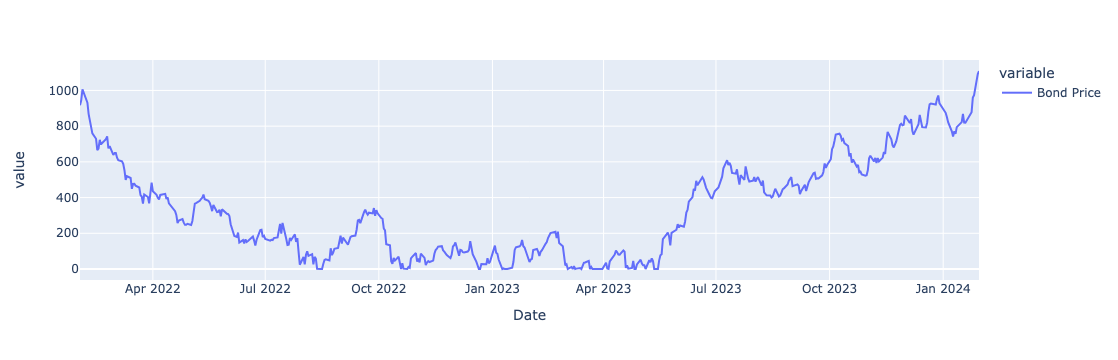

In [19]:
# Simulate the bond price with an ideal seed: 1167

seeds = [865, 1002, 1008, 1002, 1008, 1131, 1167, 1172, 1931]
np.random.seed(seeds[0])

N = df_bond.shape[0]
exponent = 0.00000005

bond_diffs = df_bond["Bond Smooth Cummulative Payouts"].diff().fillna(0)
bond_std = np.std(df_bond["Bond Smooth Cummulative Payouts"]) / 3.0
bond_mean = np.mean(df_bond["Bond Smooth Cummulative Payouts"])
bond_influence = 0.3

stock_diffs = df_raw["Equity Risk"].diff().fillna(0)
stock_std = np.std(df_raw["Equity Risk"]) / 3.0
stock_mean = np.mean(df_raw["Equity Risk"])
stock_influence = 0.3


def decay_factor(date):
    days_to_maturity = (MATURITY_DATE - date).days
    decay = np.exp(-exponent * days_to_maturity)  # Exponential decay factor
    return decay

def growth_factor(date):
    days_to_maturity = (MATURITY_DATE - date).days
    growth = np.exp(exponent * days_to_maturity)  # Exponential growth factor
    return growth


bond_prices = []
prev_move = bond_purchase_price
for i in range(N):
    
    date = df_bond["Date"].iloc[i]
    decay = decay_factor(date)
    stock_random = np.random.normal(0, stock_std)
    stock_change = stock_diffs[i]
    stock_random_change = (stock_change + stock_random) * stock_influence * decay 

    growth = growth_factor(date)
    bond_random = np.random.normal(0, bond_std)
    bond_change = bond_diffs[i]
    bond_random_change = (bond_change + bond_random) * bond_influence * growth

    simulated_price = max(stock_random_change + bond_random_change + prev_move, 0.01)

    prev_move = simulated_price
    bond_prices.append(simulated_price)

df_raw["Bond Price"] = bond_prices
df_raw["Bond Price Normalized"] = df_raw["Bond Price"] / df_raw["Bond Price"].mean()
px.line(df_raw, x="Date", y=["Bond Price"])

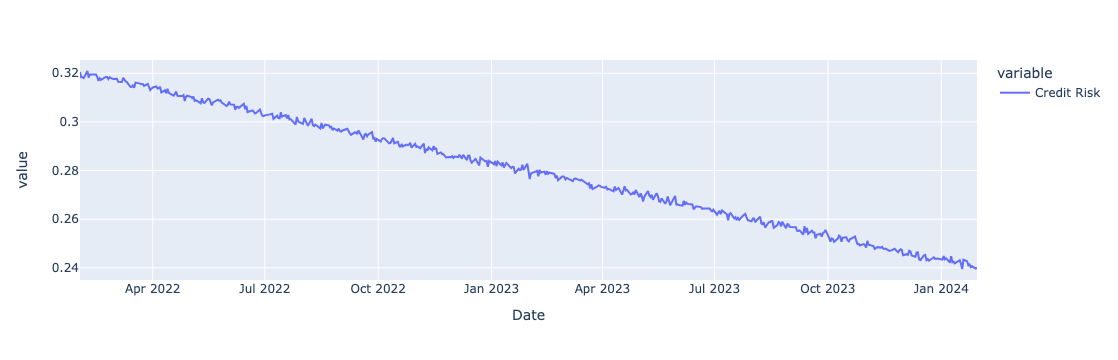

In [8]:
# Simulate Credit Risk

# 0.24 in 2023; 0.32 in 2022
# debt / equity ratio from https://stockanalysis.com/stocks/crc/financials/ratios/


np.random.seed(12345678)

N = df_raw.shape[0]
M = (0.24 - 0.32) / float(N)
B = 0.32

y_values = np.array([(M * x) + B + np.random.normal(0, 0.001) for x in range(N)])
df_raw["Credit Risk"] = y_values
df_raw["Credit Risk Normalized"] = df_raw["Credit Risk"] / df_raw["Credit Risk"].mean()

px.line(df_raw, x="Date", y=["Credit Risk"])

['Equity Risk', 'Equity Market Risk', 'Market Volatility Risk', 'Market Liquidity Risk', 'HYB Market Risk', 'Bond Market Risk', 'Short-Term Interest Rate Risk', 'Medium-Term Interest Rate Risk', 'Long-Term Interest Rate Risk', 'Inflation Risk', 'Credit Risk']


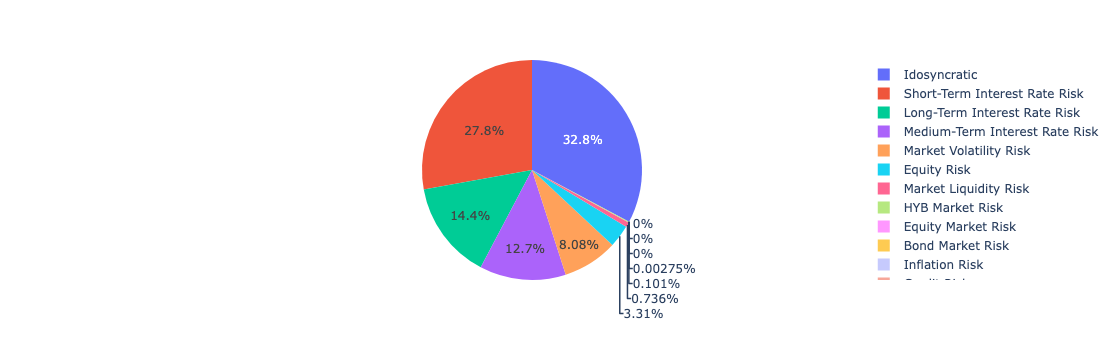

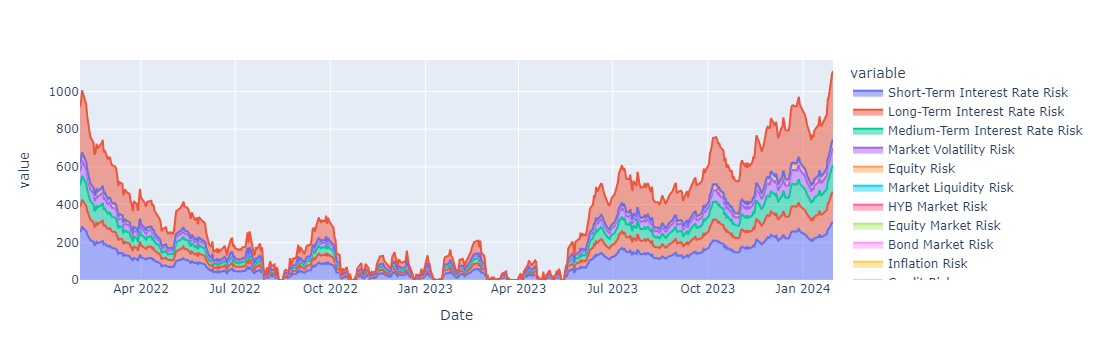

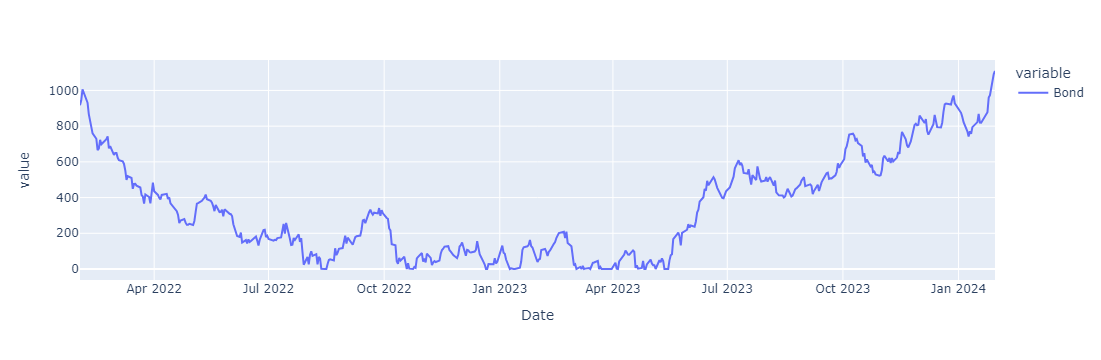

In [20]:
# Ridge Regression L1_wt = 0
# LASSO Regression L1_wt = 1
# Elastic Net Regression 0 < L1_wt < 1


ALPHA = 2
L1 = 1.0
USE_NORMALIZED = False
ignore_columns = ["Date", "Bond Price", "Bond Price Normalized"]


if USE_NORMALIZED:
    columns = [c for c in df_raw.columns if (c not in ignore_columns) and ("Normalized" in c)]
    target = "Bond Price Normalized"
else:
    columns = [c for c in df_raw.columns if (c not in ignore_columns) and ("Normalized" not in c)]
    target = "Bond Price"
print(columns)

X = sm.add_constant(df_raw[columns])
X = X.fillna(X.mean())

model = sm.OLS(df_raw[target], X).fit_regularized(alpha=ALPHA, L1_wt=L1)
param_names = [name.replace(" Normalized", "") for name in model.model.exog_names]
param_values = list(model.params)

param_abs_values = [abs(float(v)) for v in param_values]
param_value_total = float(sum(param_abs_values))
param_proportion = [v/param_value_total for v in param_abs_values]
key_value = [(param_names[i], param_proportion[i]) for i in range(len(param_names))]
key_value.sort(key=lambda x: x[1], reverse=True)
const = float([x[1] for x in key_value if x[0] == "const"][0])
key_value = [x for x in key_value if x[0] != "const"]
key_value.append(["Idosyncratic", const])

df_pie = pd.DataFrame()
df_pie["Name"] = [x[0] for x in key_value]
df_pie["Value"] = [x[1] for x in key_value]
px.pie(df_pie, values="Value", names="Name").show()


proportion_total = np.zeros(df_raw.shape[0])

df_final = pd.DataFrame()
df_final["Date"] = df_raw["Date"]
df_final["Bond"] = df_raw[target]

for name, proportion in key_value:
    value = (df_final["Bond"] * proportion)
    df_final[name] = value

y_labels = [x[0] for x in key_value]
px.area(df_final, x="Date", y=y_labels).show()
px.line(df_final, x="Date", y=["Bond"]).show()

In [27]:
# Ridge Regression L1_wt = 0
# LASSO Regression L1_wt = 1
# Elastic Net Regression 0 < L1_wt < 1

DEGREE = 2
ALPHA = 2
L1 = 1.0
USE_NORMALIZED = False
ignore_columns = ["Date", "Bond Price", "Bond Price Normalized"]


if USE_NORMALIZED:
    columns = [c for c in df_raw.columns if (c not in ignore_columns) and ("Normalized" in c)]
    target = "Bond Price Normalized"
else:
    columns = [c for c in df_raw.columns if (c not in ignore_columns) and ("Normalized" not in c)]
    target = "Bond Price"
print(columns)


original_column_names = df_raw[columns].columns.tolist()
X_poly = PolynomialFeatures(degree=DEGREE, include_bias=False).fit_transform(df_raw[columns])
X_poly = pd.DataFrame(X_poly, columns=original_column_names)
X_poly.fillna(X_poly.mean(), inplace=True)
X_poly = sm.add_constant(X_poly, prepend=False)

model = sm.OLS(df_raw[target], X_poly).fit_regularized(alpha=ALPHA, L1_wt=L1)


param_names = [name.replace(" Normalized", "") for name in model.model.exog_names]
param_values = list(model.params)

param_abs_values = [abs(float(v)) for v in param_values]
param_value_total = float(sum(param_abs_values))
param_proportion = [v/param_value_total for v in param_abs_values]
key_value = [(param_names[i], param_proportion[i]) for i in range(len(param_names))]
key_value.sort(key=lambda x: x[1], reverse=True)
const = float([x[1] for x in key_value if x[0] == "const"][0])
key_value = [x for x in key_value if x[0] != "const"]
key_value.append(["Idosyncratic", const])

df_pie = pd.DataFrame()
df_pie["Name"] = [x[0] for x in key_value]
df_pie["Value"] = [x[1] for x in key_value]
px.pie(df_pie, values="Value", names="Name").show()


proportion_total = np.zeros(df_raw.shape[0])

df_final = pd.DataFrame()
df_final["Date"] = df_raw["Date"]
df_final["Bond"] = df_raw[target]

for name, proportion in key_value:
    value = (df_final["Bond"] * proportion)
    df_final[name] = value

y_labels = [x[0] for x in key_value]
px.area(df_final, x="Date", y=y_labels).show()
px.line(df_final, x="Date", y=["Bond"]).show()



['Equity Risk', 'Equity Market Risk', 'Market Volatility Risk', 'Market Liquidity Risk', 'HYB Market Risk', 'Bond Market Risk', 'Short-Term Interest Rate Risk', 'Medium-Term Interest Rate Risk', 'Long-Term Interest Rate Risk', 'Inflation Risk', 'Credit Risk']


ValueError: Shape of passed values is (501, 77), indices imply (501, 11)